# Neural Networks & Deep Learning: ICP1

1.Implement Naïve Bayes method using scikit-learn library
Use dataset available with name glass
Use train_test_split to create training and testing part
Evaluate the model on test part using score and

classification_report(y_true, y_pred)

In [1]:
#importing necessary libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, mean_squared_error, r2_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# using pandas we are reading glass data set

glass_df = pd.read_csv('NNDL_Code and Data/glass.csv')

In [3]:
# Information about the Glass Dataset
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Dividing the dataset into dependent and Independent Variables

y = glass_df['Type']
X = glass_df.drop(['Type'],axis=1)


In [5]:
# Splitting the Dataset into Train (66%) and Test (33%) data samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [6]:
# Using GaussianNB Naive Bayes Algorithm training and predicting the model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"%  (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 71 points : 32


In [7]:
# classification Report for the predicted data
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.68      0.57      0.62        23
           2       0.62      0.32      0.42        25
           3       0.11      1.00      0.20         2
           5       0.50      0.17      0.25         6
           6       0.71      1.00      0.83         5
           7       0.83      1.00      0.91        10

    accuracy                           0.55        71
   macro avg       0.58      0.68      0.54        71
weighted avg       0.65      0.55      0.56        71



In [8]:
# f1 Score for Naive Bayes
f1 = f1_score(y_test, y_pred, average=None)
print("f1 score with Naive Bayes : ", sum(f1)/len(f1))

f1 score with Naive Bayes :  0.5387540821751348


2. Implement linear SVM method using scikit-learn
Use the same dataset above
Use train_test_split to create training and testing part
Evaluate the model on test part using score and

classification_report(y_true, y_pred)

Which algorithm you got better accuracy? Can you justify why?

In [9]:
# Linear Support Vector Classifier 

svc = LinearSVC(tol=1e-5,max_iter = 10000)

In [10]:
# Training Linear SVC and predicting test variables

y_pred = svc.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"%  (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 71 points : 34


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# classification report for Linear SVC
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.52      0.96      0.68        23
           2       0.36      0.20      0.26        25
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.77      1.00      0.87        10

    accuracy                           0.52        71
   macro avg       0.28      0.36      0.30        71
weighted avg       0.40      0.52      0.43        71



In [12]:
# f1 Score for Linear SVC
f1 = f1_score(y_test, y_pred, average = None)
print("f1 score with Linear SVC : ", sum(f1)/len(f1))

f1 score with Linear SVC :  0.30048309178743965


With the above results Linear SVC performed better compared to Naive Bayes based on f1 scores

SVMs are different from other Naive Bayes algorithm because of the way they choose the decision boundary that maximizes 
the distance from the nearest data points of all the classes. 
The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.

3. Implement Linear Regression using scikit-learn
a) Import the given “Salary_Data.csv”
b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c) Train and predict the model.
d) Calculate the mean_squared error.
e) Visualize both train and test data using scatter plot.

In [13]:
# Reading Salary Dataset
salary_df = pd.read_csv('NNDL_Code and Data/Salary_Data.csv')

In [14]:
# Salary Dataset information
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [15]:
# seperating dependent and Independent variables

X = salary_df[['YearsExperience']]
y = salary_df['Salary']


In [16]:
# Splitting dataset into Train (67%) and Test (33%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [17]:
# Training data with Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)

In [18]:
# Predicting the test data
y_pred = reg.predict(X_test)

In [19]:
# Mean Squared Error calculation
mean_squared_error(y_test,y_pred)

21026037.329511303

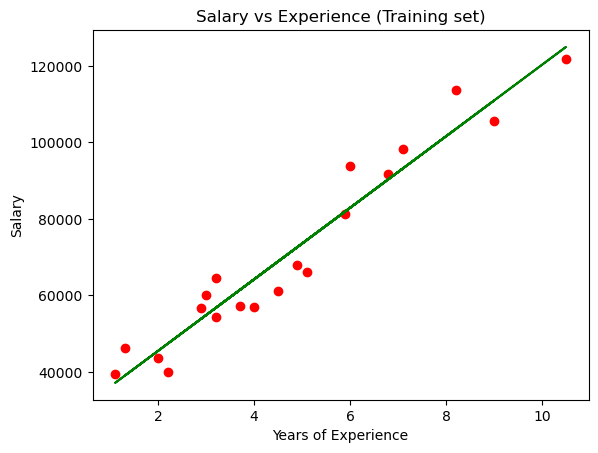

In [20]:
# Visualization of training data with fitted regression line

plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

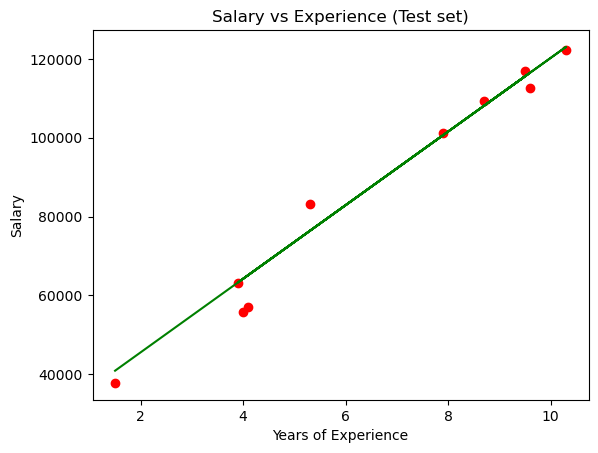

In [21]:
# Visualization of testing data with fitted regression line


plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()